### Group Members 
- Kyle Whynott
- Brandon Winkler

## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

## Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br>All data need to be separated by the same distance.


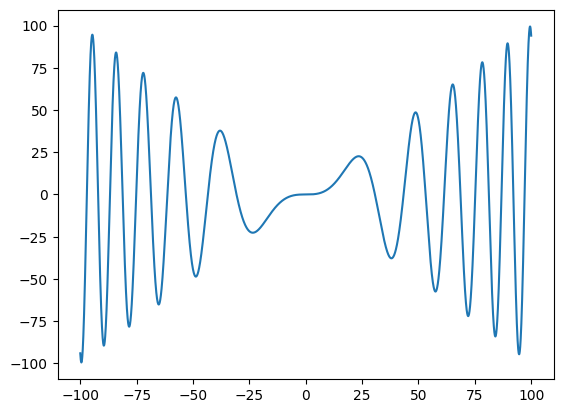

In [44]:
import matplotlib.pyplot as plt
import numpy as np

xc = np.linspace(-100, 100, 10000)
yc = xc * np.sin(xc**2/300)

plt.plot(xc, yc)
plt.show()

#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [45]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, activations
from keras.models import Sequential
from keras.layers import Input, Dense, PReLU
from keras.metrics import CosineSimilarity
X, y = xc, yc
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.4)

In [53]:
# model 1
# Define the custom activation function
def custom_activation(x_train):
    return x_train * tf.sin(x_train**2 / 300)

# Create a model using the custom activation function
model_1 = Sequential([
    Input(shape=(1,)),
    Dense(125),
    tf.keras.layers.Lambda(custom_activation),
    # Add more layers as needed
])

model_1.add(Dense(100,activation = activations.leaky_relu))
model_1.add(Dense(100,activation = activations.leaky_relu))
model_1.add(Dense(100,activation = PReLU()))
model_1.add(Dense(100,activation = PReLU()))
model_1.add(Dense(100,activation = activations.elu))
model_1.add(Dense(100,activation = activations.elu))
model_1.add(Dense(100,activation = activations.elu))
model_1.compile(
loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model_1.fit(x_train, y_train, batch_size = 256, epochs = 200) 

Epoch 1/200


2024-03-16 20:59:58.567206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [256] vs. [256,125]
	 [[{{function_node __inference_one_step_on_data_15614}}{{node gradient_tape/compile_loss/MAE/sub/BroadcastGradientArgs}}]]


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/MAE/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/kyle/venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/kyle/venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/kyle/venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/kyle/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_7450/2361018764.py", line 16, in <module>

  File "/home/kyle/venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/home/kyle/venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 323, in fit

  File "/home/kyle/venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/home/kyle/venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 105, in one_step_on_data

  File "/home/kyle/venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 69, in train_step

Incompatible shapes: [256] vs. [256,125]
	 [[{{node gradient_tape/compile_loss/MAE/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_15643]

In [22]:
# model 2
model_2 = Sequential()
model_2.add(Input(shape=(1,)))
model_2.add(Dense(100,activation = "LeakyReLU"))
model_2.add(Dense(200,activation = "PReLU"))
model_2.add(Dense(200,activation = "PReLU"))
model_3.add(Dense(300,activation = "ELU"))
model_3.add(Dense(300,activation = "ELU"))
model_3.add(Dense(300,activation = "ELU"))
model_3.add(Dense(300,activation = "ELU"))
model_2.add(Dense(1))

model_2.compile(
loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model_2.fit(x_train, y_train, batch_size = 128, epochs = 200) 

ValueError: Could not interpret activation function identifier: LeakyReLU

In [23]:
# model 3
model_3 = Sequential()
model_3.add(Input(shape=(1,)))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(200,activation = "ELU"))
model_3.add(Dense(1))

model_3.compile(
loss = 'MAE', optimizer = 'Adam', metrics=['mae']
)
model_3.fit(x_train, y_train, batch_size = 128, epochs = 200) 

ValueError: Could not interpret activation function identifier: ELU

In [24]:
import ipywidgets as widgets

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


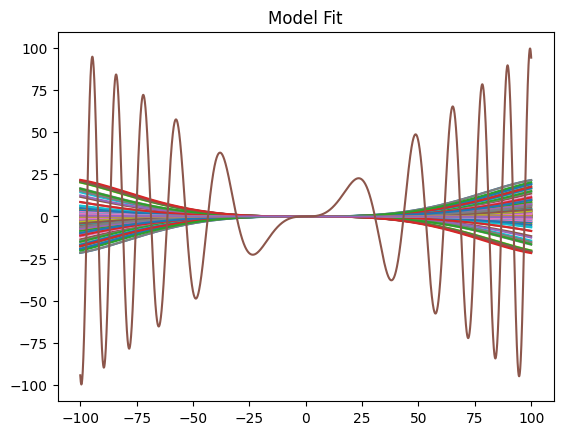

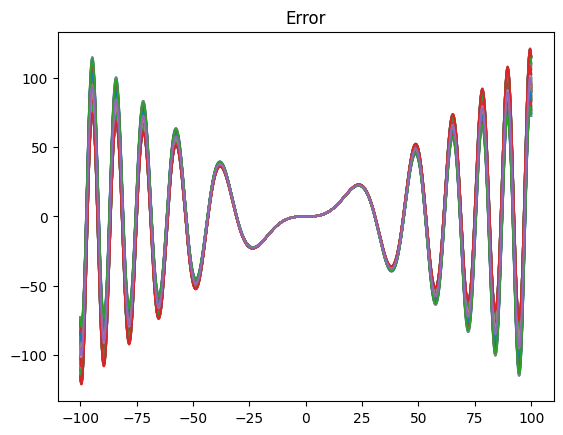

In [25]:
out1 = widgets.Output()
with out1:
    py = model_1.predict(xc)
    plt.plot(xc, py)
    plt.plot(xc, yc)
    plt.title("Model Fit")
    plt.show()
    es = []
    for i in range(len(py)):
      es.append(yc[i] - py[i])
    plt.plot(xc, es)
    plt.title("Error")
    plt.show()
    

In [26]:
out2 = widgets.Output()
with out2:
    py = model_2.predict(xc)
    plt.plot(xc, py)
    plt.plot(xc, yc)
    plt.title("Model Fit")
    plt.show()
    es = []
    for i in range(len(py)):
      es.append(yc[i] - py[i])
    plt.plot(xc, es)
    plt.title("Error")
    plt.show()
    

ValueError: Sequential model 'sequential_3' has already been configured to use input shape (None, 1). You cannot build it with input_shape (32,)

In [27]:
out3 = widgets.Output()
with out3:
    py = model_3.predict(xc)
    plt.plot(xc, py)
    plt.plot(xc, yc)
    plt.title("Model Fit")
    plt.show()
    es = []
    for i in range(len(py)):
      es.append(yc[i] - py[i])
    plt.plot(xc, es)
    plt.title("Error")
    plt.show()
    

ValueError: Sequential model 'sequential_4' has already been configured to use input shape (None, 1). You cannot build it with input_shape (32,)

#### Part 3 model evaluation
|
In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

In [28]:
# model 1 evaluation
display(widgets.HBox([out1]))
model_1.evaluate(x_test, y_test, batch_size = 6400)

ValueError: You must call `compile()` before using the model.

In [29]:
# model 2 evaluation
display(widgets.HBox([out2]))
model_2.evaluate(x_test, y_test, batch_size = 6400)

ValueError: You must call `compile()` before using the model.

In [30]:
# model 3 evaluation
display(widgets.HBox([out3]))
model_3.evaluate(x_test, y_test, batch_size = 6400)

ValueError: You must call `compile()` before using the model.

Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.


Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
They should be identical for the first several digitals, if not for all digits.

In [31]:
# get the Model's weights
model_3_weight_bias = model_3.get_weights()
model_3_layers = []

In [32]:
for layer in model_3.layers:
    weights_biases = layer.get_weights()  # This is a list where element 0 is weights and element 1 is biases
    if weights_biases:  # Some layers like Dropout do not have weights
        model_3_layers.append({
            "weights": weights_biases[0],
            "biases": weights_biases[1],
            "activation": layer.activation
        })

In [33]:
def eval_elu(x_test, alpha=1.0):
    return np.where(x_test > 0, alpha * (np.exp(x_test) - 1))

# Map the activation function names to the actual implementations
activation_functions = {
    "elu": eval_elu
}

In [34]:
def forward_propagate(x_test, model_layers):
    activations = x_test
    for layer in model_3_layers:
        z = np.dot(activations, layer["weights"]) + layer["biases"]
        activation_fn = activation_functions.get(layer["activation"], lambda x_test: x_test)
        activations = activation_fn(z)
    return activations

input_data = np.random.rand(6000, model_3.input_shape[1])

# Calculate the manual prediction
manual_prediction = forward_propagate(input_data, model_3_layers)

ValueError: Sequential model 'sequential_4' has no defined input shape yet.

In [41]:
model_3_predict = model_3.predict(x_test)

ValueError: Sequential model 'sequential_12' has already been configured to use input shape (None, 1). You cannot build it with input_shape (32,)

In [328]:
manual_prediction[0:5]

array([[-44.50695816],
       [-37.94209919],
       [-42.95028042],
       [-39.42174853],
       [-43.75125807]])

In [329]:
model_3_predict[0:5]

array([[  0.88845354],
       [-39.237404  ],
       [-71.250084  ],
       [ 18.692299  ],
       [-20.698515  ]], dtype=float32)